## Training simple CNN model for Image Classification

#### Loading Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.models as Models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import cv2

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Loading data

In [2]:
train_dir='/kaggle/input/intel-image-classification/seg_train/seg_train'
test_dir='/kaggle/input/intel-image-classification/seg_test/seg_test'

In [3]:
IMAGE_SIZE = (228, 228)

BATCH_SIZE = 32

In [4]:
#Standardizig data
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE)

Found 14034 files belonging to 6 classes.


In [5]:
#Standardizig data
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE)

Found 3000 files belonging to 6 classes.


In [6]:
class_names = train_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [7]:
type(train_ds)

tensorflow.python.data.ops.batch_op._BatchDataset

#### Visualizing data

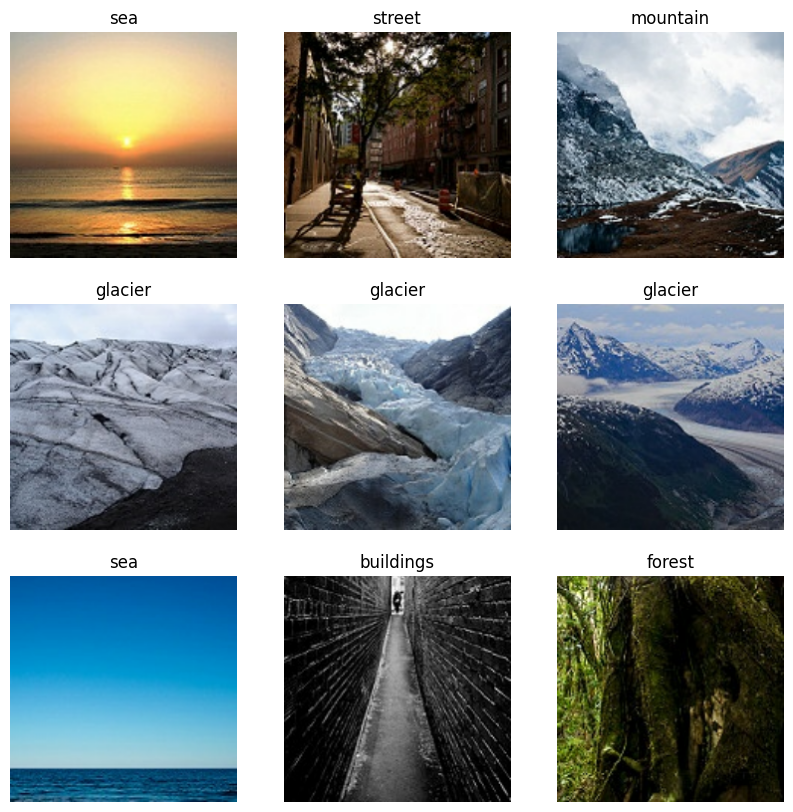

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
num_classes = len(class_names)

#### CNN model

In [10]:
model = Models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (228, 228, 3)))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 226, 226, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 113, 113, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [12]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [13]:
# SETUP A EARLY STOPPING CALL and model check point API
earlystopping = EarlyStopping(monitor='val_loss',
                                              patience=5,
                                              verbose=1,
                                              mode='min'
                                              )
checkpointer = ModelCheckpoint(filepath='bestvalue', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]

In [14]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=35,
    callbacks=callback_list
)

Epoch 1/35
439/439 [==============================] - 46s 76ms/step - loss: 1.2474 - accuracy: 0.5483 - val_loss: 0.9073 - val_accuracy: 0.6683
Epoch 2/35
439/439 [==============================] - 20s 45ms/step - loss: 0.8387 - accuracy: 0.6877 - val_loss: 0.7082 - val_accuracy: 0.7510
Epoch 3/35
439/439 [==============================] - 21s 46ms/step - loss: 0.6976 - accuracy: 0.7478 - val_loss: 0.6674 - val_accuracy: 0.7650
Epoch 4/35
439/439 [==============================] - 18s 42ms/step - loss: 0.6321 - accuracy: 0.7759 - val_loss: 0.6744 - val_accuracy: 0.7480
Epoch 5/35
439/439 [==============================] - 20s 46ms/step - loss: 0.5399 - accuracy: 0.8067 - val_loss: 0.5754 - val_accuracy: 0.7967
Epoch 6/35
439/439 [==============================] - 20s 46ms/step - loss: 0.4952 - accuracy: 0.8234 - val_loss: 0.5462 - val_accuracy: 0.8133
Epoch 7/35
439/439 [==============================] - 18s 41ms/step - loss: 0.4307 - accuracy: 0.8454 - val_loss: 0.5969 - val_accuracy:

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 226, 226, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 113, 113, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

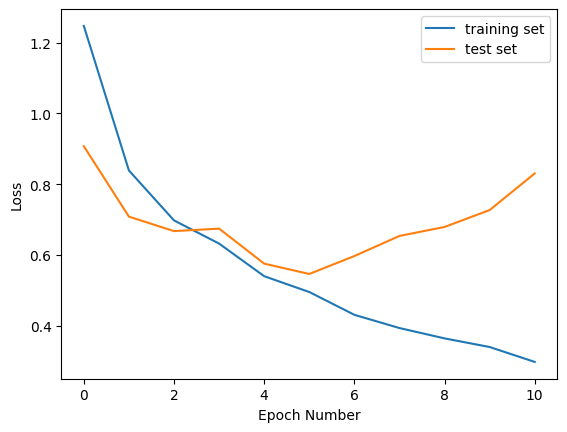

In [16]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='test set')
plt.legend()

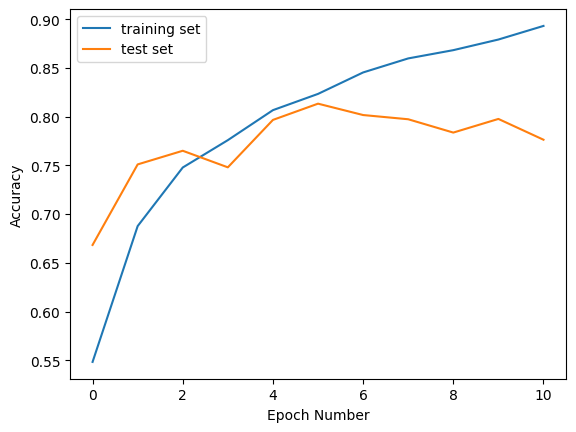

In [17]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label='test set')
plt.legend()

In [18]:
# load the prediction data and predict class on unseen data
def getImagePaths(path):
    image_names = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            image_names.append(fullpath)
    return image_names

pred_dir = '/kaggle/input/intel-image-classification/seg_pred'

images_paths = getImagePaths(pred_dir)
len(images_paths)

7301

In [19]:
# images path list to numpy array using cv2.imread module
file_array = []

for file in images_paths[:9]:
    img_ = image.load_img(file, target_size=(228, 228))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255. 
    file_array.append(img_processed)
    
file_array = np.array(file_array)

In [20]:
classes = train_ds.class_names
print(classes)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [21]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(228, 228))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='black')
    plt.imshow(img_array)

1/1 [==============================] - 0s 335ms/step


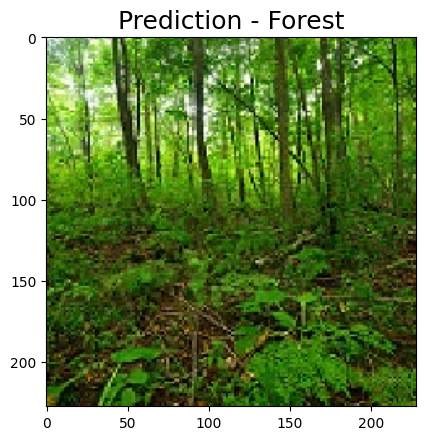

In [22]:
predict_image('/kaggle/input/intel-image-classification/seg_pred/seg_pred/10060.jpg', model)

#### InceptionV3 model

In [23]:
##Trying InceptionV3
base_model = tf.keras.applications.InceptionV3(input_shape=(228,228, 3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )

87910968/87910968 [==============================] - 0s 0us/step


In [24]:
model_inc = tf.keras.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation="softmax")
])
model_inc.compile(loss='sparse_categorical_crossentropy' , optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001) , metrics='accuracy')


In [25]:
hist_inc = model_inc.fit(train_ds ,
          validation_data = test_ds ,
          epochs = 15)
#           steps_per_epoch = 14034/32, # train_files/batch_size
#           validation_steps = 3000/32, # valid_files/batch_size 
#           )

Epoch 1/15
439/439 [==============================] - 160s 264ms/step - loss: 0.5575 - accuracy: 0.8251 - val_loss: 0.4895 - val_accuracy: 0.8343
Epoch 2/15
439/439 [==============================] - 110s 249ms/step - loss: 0.3348 - accuracy: 0.8871 - val_loss: 0.7359 - val_accuracy: 0.7770
Epoch 3/15
439/439 [==============================] - 109s 248ms/step - loss: 0.2865 - accuracy: 0.9027 - val_loss: 0.3939 - val_accuracy: 0.8637
Epoch 4/15
439/439 [==============================] - 109s 248ms/step - loss: 0.2462 - accuracy: 0.9168 - val_loss: 0.6677 - val_accuracy: 0.8143
Epoch 5/15
439/439 [==============================] - 109s 249ms/step - loss: 0.2370 - accuracy: 0.9178 - val_loss: 0.6622 - val_accuracy: 0.8027
Epoch 6/15
439/439 [==============================] - 109s 249ms/step - loss: 0.2078 - accuracy: 0.9274 - val_loss: 0.3842 - val_accuracy: 0.8713
Epoch 7/15
439/439 [==============================] - 109s 249ms/step - loss: 0.2119 - accuracy: 0.9247 - val_loss: 0.4512 -

1/1 [==============================] - 2s 2s/step


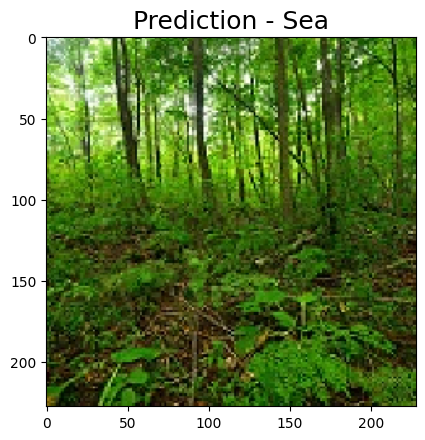

In [26]:
predict_image('/kaggle/input/intel-image-classification/seg_pred/seg_pred/10060.jpg', model_inc)